# Generic example

## Import python package for plotting.

In [2]:
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
import numpy as np
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Import pyrtlib package

In [3]:
from pyrtlib.climatology import AtmosphericProfiles as atmp
from pyrtlib.tb_spectrum import TbCloudRTE
from pyrtlib.utils import ppmv2gkg, mr2rh

In [4]:
atm = ['Tropical',
       'Midlatitude Summer',
       'Midlatitude Winter',
       'Subarctic Summer',
       'Subarctic Winter',
       'U.S. Standard']

Load standard atmosphere (low res at lower levels, only 1 level within 1 km) and define which absorption model will be used.

In [5]:
z, p, d, t, md = atmp.gl_atm(atmp.TROPICAL)
gkg = ppmv2gkg(md[:, atmp.H2O], atmp.H2O)
rh = mr2rh(p, t, gkg)[0] / 100

mdl = 'R16'

## Performing upwelling brightness temperature calculation

Default calculatoin consideres no cloud

In [6]:
ang = np.array([90.])
frq = np.arange(20, 201, 1)
nf = len(frq)

Setup matplotlib plot

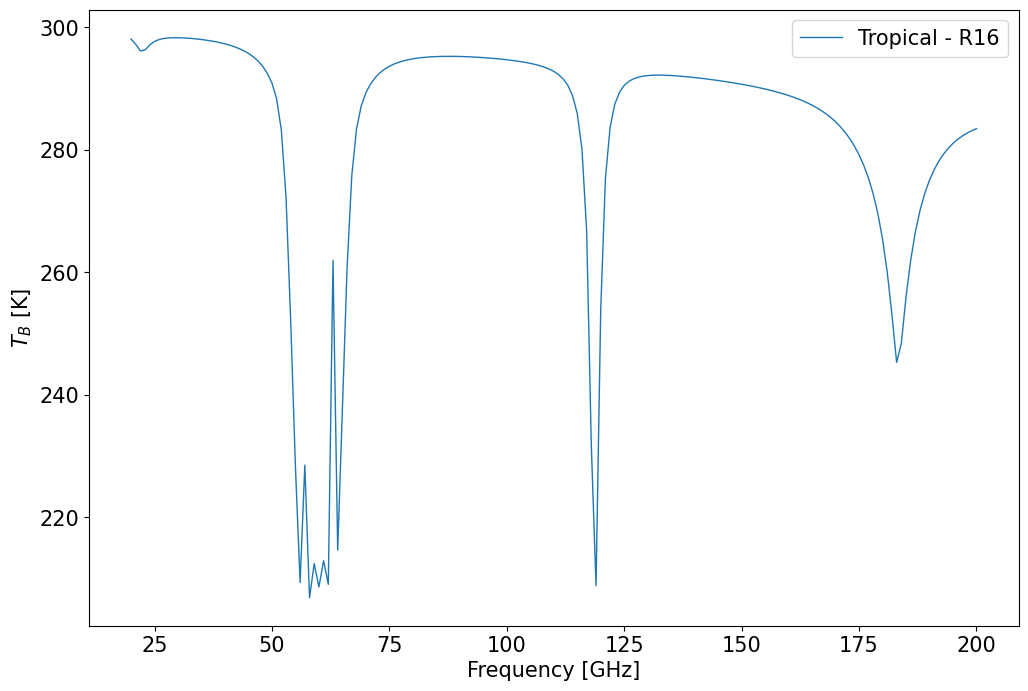

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('${T_B}$ [K]')

rte = TbCloudRTE(z, p, t, rh, frq, ang)
rte.init_absmdl(mdl)
df = rte.execute()

df = df.set_index(frq)
df.tbtotal.plot(ax=ax, linewidth=1, label='{} - {}'.format(atm[atmp.TROPICAL], mdl))

ax.legend()
plt.show()

Print dataframe

In [8]:
df

,tbtotal,tbatm,tmr,tmrcld,tauwet,taudry,tauliq,tauice
20,298.109969,0.0,286.950133,0.0,0.120344,0.012855,0.0,0.0
21,297.245630,0.0,286.301043,0.0,0.188808,0.013524,0.0,0.0
22,296.153517,0.0,285.000663,0.0,0.261848,0.014259,0.0,0.0
23,296.340241,0.0,285.636022,0.0,0.257913,0.015066,0.0,0.0
24,297.158441,0.0,286.738496,0.0,0.202308,0.015954,0.0,0.0
...,...,...,...,...,...,...,...,...
196,281.727042,0.0,281.270840,0.0,3.672975,0.025784,0.0,0.0
197,282.281780,0.0,281.731501,0.0,3.460000,0.025956,0.0,0.0
198,282.747798,0.0,282.109277,0.0,3.289848,0.026129,0.0,0.0
199,283.139746,0.0,282.420450,0.0,3.152710,0.026302,0.0,0.0


## Performing calculation for R03 absorption model

In [9]:
mdl = 'R03'
rte.init_absmdl(mdl)
df_r03 = rte.execute()
df_r03 = df_r03.set_index(frq)

Add brigthness temperature values as new column

In [10]:
df['delta'] = df.tbtotal - df_r03.tbtotal

In [11]:
df

,tbtotal,tbatm,tmr,tmrcld,tauwet,taudry,tauliq,tauice,delta
20,298.109969,0.0,286.950133,0.0,0.120344,0.012855,0.0,0.0,-0.005362
21,297.245630,0.0,286.301043,0.0,0.188808,0.013524,0.0,0.0,-0.055802
22,296.153517,0.0,285.000663,0.0,0.261848,0.014259,0.0,0.0,-0.149566
23,296.340241,0.0,285.636022,0.0,0.257913,0.015066,0.0,0.0,-0.084145
24,297.158441,0.0,286.738496,0.0,0.202308,0.015954,0.0,0.0,-0.001669
...,...,...,...,...,...,...,...,...,...
196,281.727042,0.0,281.270840,0.0,3.672975,0.025784,0.0,0.0,-0.166236
197,282.281780,0.0,281.731501,0.0,3.460000,0.025956,0.0,0.0,-0.158865
198,282.747798,0.0,282.109277,0.0,3.289848,0.026129,0.0,0.0,-0.152032
199,283.139746,0.0,282.420450,0.0,3.152710,0.026302,0.0,0.0,-0.145768


Difference between R16 and R03 brightness temperature

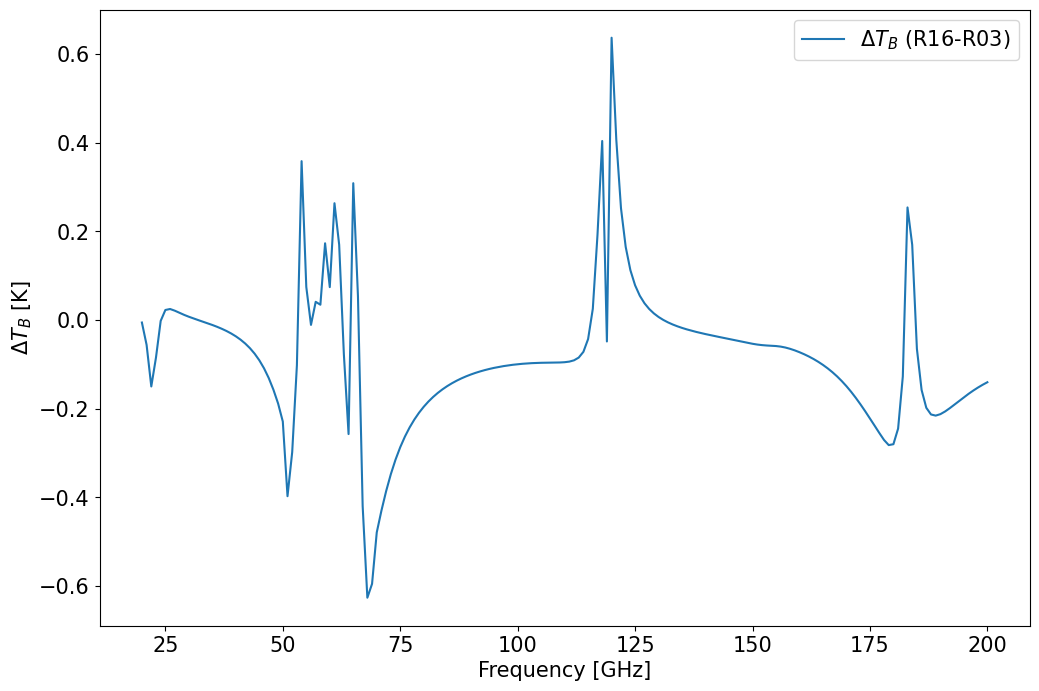

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('$\Delta {T_B}$ [K]')
df.delta.plot(ax=ax, figsize=(12,8), label='$\Delta {T_B}$ (R16-R03)')
ax.legend()
plt.show()

## Performing downwelling brightness temperature calculation

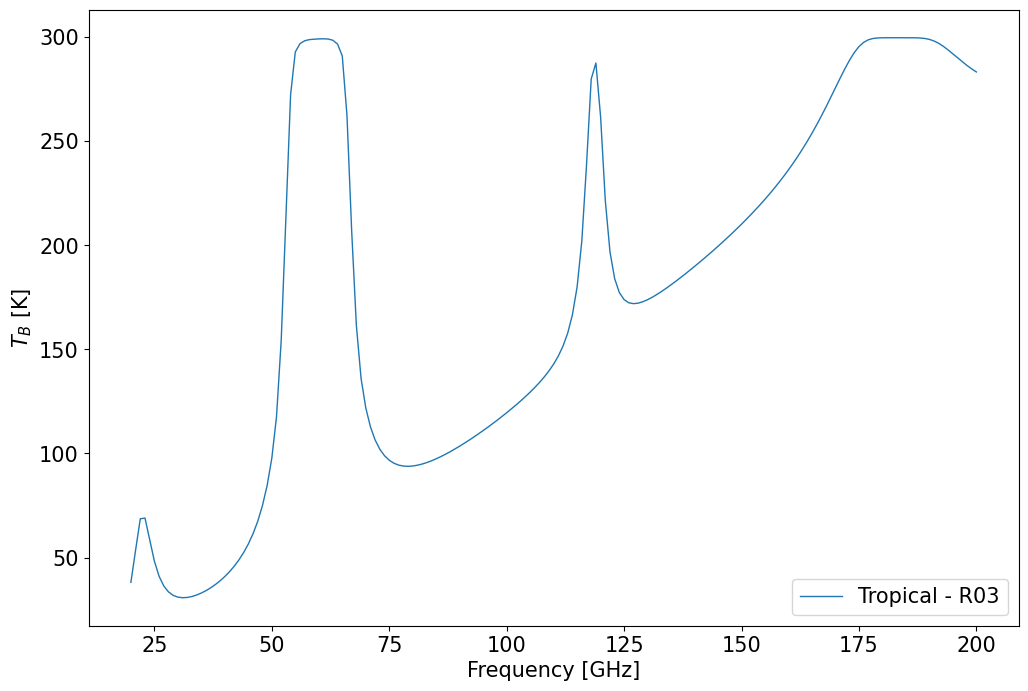

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('${T_B}$ [K]')

rte.satellite = False
df_from_ground = rte.execute()

df_from_ground = df_from_ground.set_index(frq)
df_from_ground.tbtotal.plot(ax=ax, linewidth=1, label='{} - {}'.format(atm[atmp.TROPICAL], mdl))
ax.legend()
plt.show()

In [14]:
df_from_ground

,tbtotal,tbatm,tmr,tmrcld,tauwet,taudry,tauliq,tauice
20,38.100580,36.106575,287.782656,0.0,0.119654,0.012748,0.0,0.0
21,53.602815,51.750325,287.549723,0.0,0.183271,0.013396,0.0,0.0
22,68.634754,66.918654,286.872703,0.0,0.249677,0.014107,0.0,0.0
23,68.966560,67.268116,287.380748,0.0,0.249866,0.014887,0.0,0.0
24,58.518276,56.754139,288.083580,0.0,0.201670,0.015745,0.0,0.0
...,...,...,...,...,...,...,...,...
196,290.020626,290.013156,297.081277,0.0,3.697474,0.025150,0.0,0.0
197,288.152409,288.143310,296.859264,0.0,3.486909,0.025315,0.0,0.0
198,286.380803,286.370182,296.671482,0.0,3.318905,0.025481,0.0,0.0
199,284.742167,284.730168,296.513609,0.0,3.183692,0.025648,0.0,0.0
